# Fish mercury data analysis

Author of this notebook: Izael Manuel Rascón Durán A01562240
Módulo 1: Estadística para ciencia de datos e Inteligencia Artificial avanzada y ciencia de datos.
Grupo: 102

Mercury contamination of fish in edible freshwater is a direct threat to our health. A recent study was conducted in 53 Florida lakes to examine factors influencing the level of mercury contamination. The variables that were measured can be found in mercury.csv and are described as follows:

X1 = identification number
X2 = lake name
X3 = alkalinity (mg/l calcium carbonate)
X4 = PH
X5 = calcium (mg/l)
X6 = chlorophyll (mg/l)
X7 = average mercury concentration (part per million) in the muscle tissue of the group of fish studied in each lake X8 = number of fish studied in each lake
X8 = number of fish studied in the lake
X9 = minimum mercury concentration in each group of fish X10 = maximum mercury concentration in each group of fish
X10 = maximum mercury concentration in each group of fish X11 = estimate (by regression) of mercury concentration in each group of fish
X11 = estimate (by regression) of the mercury concentration in the 3-year-old fish (or average mercury when age is not available)
X12 = indicator of the age of the fish (0: young; 1: mature).

Around the main research question that arises in this study: what are the main factors influencing the level of mercury contamination in fish in Florida lakes? Parallel questions may arise that break down this general question:

- Is there evidence to assume that the average concentration of mercury in the lakes is harmful to human health? Consider that the reference regulations for assessing maximum Hg levels (Regulation 34687-MAG and international regulations EC 1881/2006 and Codex Standard 193-1995) state that the average mercury concentration in fishery products should not exceed 0.5 mg Hg/kg.
- Will there be significant difference between mercury concentration by age of fish?
- If the sampling was done by casting a net and analyzing the fish that the net encountered, will the number of fish encountered influence the mercury concentration in the fish?
- Do the concentrations of alkalinity, chlorophyll, calcium in the lake water influence the mercury concentration of the fish?

## Database exploration
### Accessing the database and setting up the required libraries

In [8]:
import pandas as pd

columns = ["name", "alkalinity", "ph", "calcium", "chlorophyll", "mean_merc_porc", "num_fish", "min_merc_porc", "max_merc_porc", "merc_estimate_porc", "age_fishes"]
df_fishes = pd.read_csv('mercurio.csv', index_col='X1')
df_fishes.columns = columns

### Analyze dataset features
In the next codeblock we can see all the available features of the dataset already described

In [9]:
print(df_fishes.columns.values)

['name' 'alkalinity' 'ph' 'calcium' 'chlorophyll' 'mean_merc_porc'
 'num_fish' 'min_merc_porc' 'max_merc_porc' 'merc_estimate_porc'
 'age_fishes']


#### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Nominal: name.

#### Which features are numerical?

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continuous: alkalinity, ph, calcium, chlorophyll, mean_merc_porc, min_merc_porc, max_merc_porc and merc_estimate_porc.
- Discrete: age_fishes and  num_fish.

In [13]:
# preview of the data

df_fishes.head()

,name,alkalinity,ph,calcium,chlorophyll,mean_merc_porc,num_fish,min_merc_porc,max_merc_porc,merc_estimate_porc,age_fishes
X1,,,,,,,,,,,
1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1


#### Extra observations
The dataset have no missing values in any feature, which means we don't have to worry about fill empty values. We can observe that there it is 11 features that are numerical data type and 1 that are string data type.

We might need to convert in future the string features (categorical data) to numerical data types (numerical data).

In [15]:
df_fishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                53 non-null     object 
 1   alkalinity          53 non-null     float64
 2   ph                  53 non-null     float64
 3   calcium             53 non-null     float64
 4   chlorophyll         53 non-null     float64
 5   mean_merc_porc      53 non-null     float64
 6   num_fish            53 non-null     int64  
 7   min_merc_porc       53 non-null     float64
 8   max_merc_porc       53 non-null     float64
 9   merc_estimate_porc  53 non-null     float64
 10  age_fishes          53 non-null     int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 5.0+ KB


### Database exploration
#### Describe the numerical features

In [17]:
df_fishes.describe()

,alkalinity,ph,calcium,chlorophyll,mean_merc_porc,num_fish,min_merc_porc,max_merc_porc,merc_estimate_porc,age_fishes
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,37.530189,6.590566,22.201887,23.116981,0.527170,13.056604,0.279811,0.874528,0.513208,0.811321
std,38.203527,1.288449,24.932574,30.816321,0.341036,8.560677,0.226406,0.522047,0.338729,0.394998
min,1.200000,3.600000,1.100000,0.700000,0.040000,4.000000,0.040000,0.060000,0.040000,0.000000
25%,6.600000,5.800000,3.300000,4.600000,0.270000,10.000000,0.090000,0.480000,0.250000,1.000000
50%,19.600000,6.800000,12.600000,12.800000,0.480000,12.000000,0.250000,0.840000,0.450000,1.000000
75%,66.500000,7.400000,35.600000,24.700000,0.770000,12.000000,0.330000,1.330000,0.700000,1.000000
max,128.000000,9.100000,90.700000,152.400000,1.330000,44.000000,0.920000,2.040000,1.530000,1.000000


#### Describe the categorical features

In [19]:
df_fishes.describe(include=['O'])

,name
count,53
unique,53
top,Alligator
freq,1


In [20]:
df_fishes.mode().iloc[0]

name                  Alligator
alkalinity                 17.3
ph                          5.8
calcium                     3.0
chlorophyll                 1.6
mean_merc_porc             0.34
num_fish                   12.0
min_merc_porc              0.04
max_merc_porc              0.06
merc_estimate_porc         0.16
age_fishes                  1.0
Name: 0, dtype: object

#### Describe the variables with using visualization tools
##### Cuantitative variables positional measures and outliers detection

<AxesSubplot:>

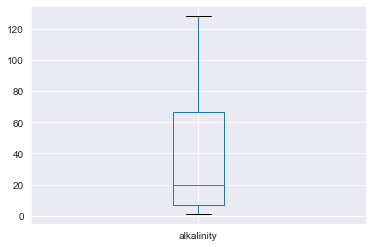

In [21]:
df_fishes.boxplot(column='alkalinity')

<AxesSubplot:>

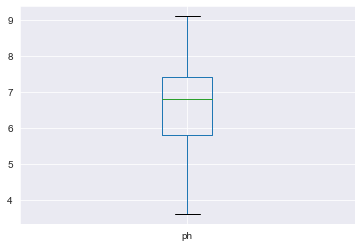

In [23]:
df_fishes.boxplot(column='ph')

<AxesSubplot:>

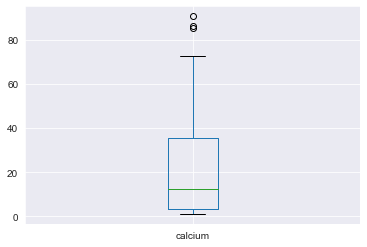

In [24]:
df_fishes.boxplot(column='calcium')

<AxesSubplot:>

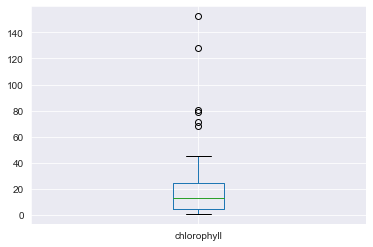

In [25]:
df_fishes.boxplot(column='chlorophyll')

<AxesSubplot:>

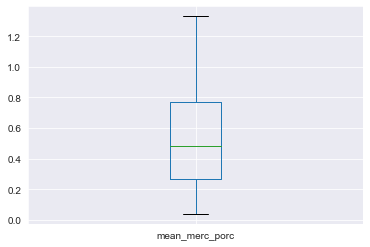

In [26]:
df_fishes.boxplot(column='mean_merc_porc')

<AxesSubplot:>

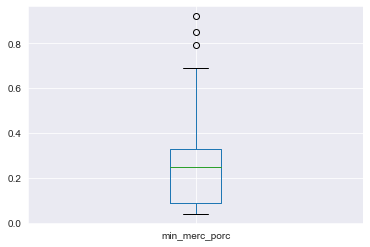

In [28]:
df_fishes.boxplot(column='min_merc_porc')

<AxesSubplot:>

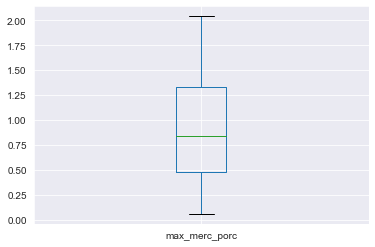

In [29]:
df_fishes.boxplot(column='max_merc_porc')

<AxesSubplot:>

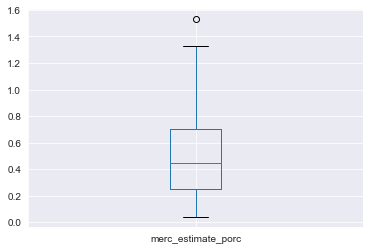

In [30]:
df_fishes.boxplot(column='merc_estimate_porc')

<AxesSubplot:>

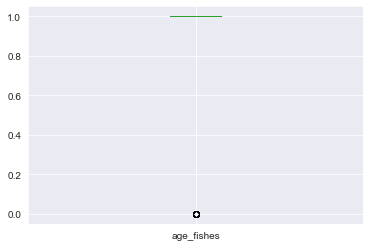

In [31]:
df_fishes.boxplot(column='age_fishes')

<AxesSubplot:>

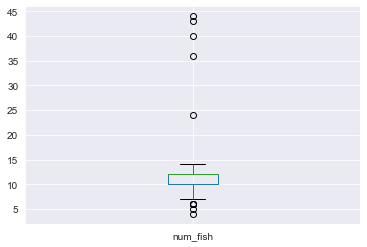

In [32]:
df_fishes.boxplot(column='num_fish')

We get the salaries outliers:

In [35]:
def get_outliers(df, cols, quantil_size):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[((df[cols] < (Q1 - quantil_size * IQR)) | (df[cols] > (Q3 + quantil_size * IQR))).any(axis=1)]
    return df



outliers_fishes = get_outliers(df_fishes, ['alkalinity', 'ph', 'calcium', 'chlorophyll', 'mean_merc_porc', 'num_fish', 'min_merc_porc', 'max_merc_porc', 'merc_estimate_porc'], 3)['name']

outliers_fishes.head()

X1
3                Apopka
9            Deer Point
14    East Tohopekaliga
17              Griffin
26            Kissimmee
Name: name, dtype: object

In [36]:
outliers_fishes.count()

7

#### Identify the data quality
Here we are looking for duplicated data, missing data and validating the relevance of each variable.
There is no duplicated regiestries

In [37]:
df_fishes.duplicated().sum()  # Duplicated registries

0

There's is no null data

In [39]:
df_fishes.isna().sum()

name                  0
alkalinity            0
ph                    0
calcium               0
chlorophyll           0
mean_merc_porc        0
num_fish              0
min_merc_porc         0
max_merc_porc         0
merc_estimate_porc    0
age_fishes            0
dtype: int64